In [1]:
import torch
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sb
import cv2

C:\Users\prash\anaconda3\envs\computer_vision\lib\site-packages\tqdm\auto.py:22: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [3]:
!git clone https://github.com/ultralytics/yolov5 

Cloning into 'yolov5'...


In [7]:
!cd 

C:\Users\prash\YOLO7\Yolo


In [8]:
!cd yolov5 & pip install -r requirements.txt

  Using cached GitPython-3.1.30-py3-none-any.whl (184 kB)
  Using cached thop-0.1.1.post2209072238-py3-none-any.whl (15 kB)
  Using cached tqdm-4.64.1-py2.py3-none-any.whl (78 kB)
  Using cached gitdb-4.0.10-py3-none-any.whl (62 kB)
  Using cached smmap-5.0.0-py3-none-any.whl (24 kB)


In [4]:
model = torch.hub.load('ultralytics/yolov5','yolov5s')

Using cache found in C:\Users\prash/.cache\torch\hub\ultralytics_yolov5_master
YOLOv5  2023-2-2 Python-3.9.15 torch-1.13.1 CUDA:0 (NVIDIA GeForce RTX 3060 Laptop GPU, 6144MiB)

Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients
Adding AutoShape... 


In [5]:
img = 'http://ultralytics.com/images/zidane.jpg'
img1 = 'https://gumlet.assettype.com/freepressjournal%2Fimport%2F2018%2F08%2FMulund-Airoli-Toll-naka.jpg?w=1200'

In [6]:
results = model(img1)
results.print()

image 1/1: 533x800 25 cars, 2 buss, 8 trucks
Speed: 195.7ms pre-process, 41.0ms inference, 15.1ms NMS per image at shape (1, 3, 448, 640)


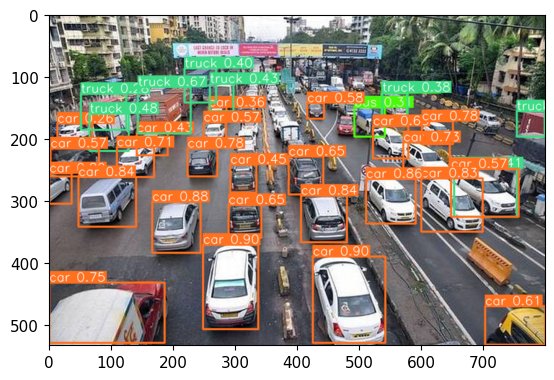

In [7]:
%matplotlib inline
plt.imshow(np.squeeze(results.render()))
plt.show()

In [8]:
np.array(results.render()).shape

(1, 533, 800, 3)

In [9]:
np.squeeze(results.render()).shape

(533, 800, 3)

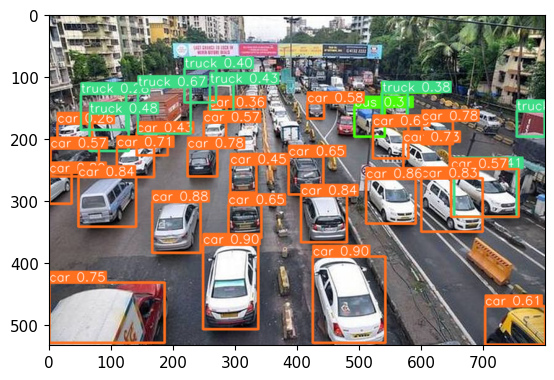

In [10]:
plt.imshow(np.squeeze(results.render()))
plt.show()

In [11]:
cap = cv2.VideoCapture('mixkit-busy-street-in-the-city.mp4')
while cap.isOpened():
    ret,frame = cap.read()
    
    # making detections
    results = model(frame)
    
    cv2.imshow('IMG', np.squeeze(results.render()))
    
    if cv2.waitKey(10) & 0xFF == ord('q'):
        break
        
cap.release()
cv2.destroyAllWindows()